## **PROJECT:04**

**AIM: EMAIL SPAM DETECTION USING ML**

**TO: OASIS INFOBYTE**

**FROM: AARYAN LIMBASIYA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the CSV file
uploaded_file_path = '/content/drive/MyDrive/spam.csv'
df = pd.read_csv(uploaded_file_path, encoding='latin1', usecols=[0, 1])

# Rename the columns for easier handling
df.columns = ['label', 'text']

# Mapping 'ham' to 0 and 'spam' to 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

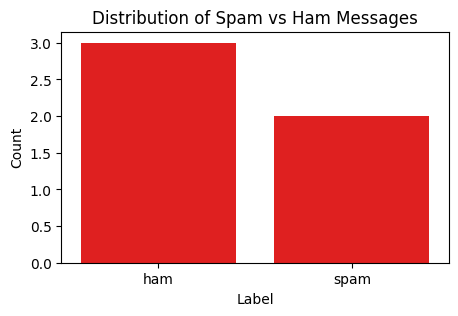

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of spam vs ham messages
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='label', color='red')
plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression()

logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Confusion Matrix:
[[962   3]
 [ 50 100]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform input size
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the neural network model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         795500    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 912877 (3.48 MB)
Trainable params: 912877 (3.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Example to print detailed layer configurations
for layer in model.layers:
    print(layer.get_config(),'\n')

{'name': 'embedding', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, None), 'input_dim': 7955, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None} 

{'name': 'lstm', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'registered_name

In [ ]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
112/112 [==============================] - 48s 384ms/step - loss: 0.1875 - accuracy: 0.9391 - val_loss: 0.0554 - val_accuracy: 0.9832
Epoch 2/5
112/112 [==============================] - 39s 348ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0634 - val_accuracy: 0.9832
Epoch 3/5
112/112 [==============================] - 38s 336ms/step - loss: 0.0082 - accuracy: 0.9986 - val_loss: 0.0606 - val_accuracy: 0.9809
Epoch 4/5
112/112 [==============================] - 39s 347ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1582 - val_accuracy: 0.9731
Epoch 5/5
112/112 [==============================] - 54s 486ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0638 - val_accuracy: 0.9888


In [ ]:
# Evaluate the model on the test data
_ , test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {test_accuracy}')

35/35 [==============================] - 1s 40ms/step - loss: 0.0833 - accuracy: 0.9821
Test Accuracy: 0.9820627570152283
